<a href="https://colab.research.google.com/github/seok09/opencv-guide/blob/main/opencv_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

프롬프트:opencv를 활용해서 인터넷에서 다운받은 사진을 바탕 화면에 저장했고 이 데이터를 입력받아 opencv로 이미지 인식이 되는걸 구글 코랩에서 실행을 하고 싶어 코드를 만들어줘

In [4]:
# OpenCV를 활용한 이미지 얼굴 인식 (Colab)

이 코드는 인터넷에서 이미지를 다운로드하고 OpenCV로 얼굴을 인식하는 예제입니다.

```python
import cv2
import urllib.request
import numpy as np
from google.colab.patches import cv2_imshow

# 1. 인터넷에서 이미지 다운로드
url = 'https://example.com/your_image.jpg'  # 원하는 이미지 URL로 변경
filename = '/content/downloaded_image.jpg'
urllib.request.urlretrieve(url, filename)

# 2. 이미지 읽기
img = cv2.imread(filename)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 3. Haar Cascade 얼굴 인식 모델 로드
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# 4. 얼굴 검출
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

# 5. 얼굴 위치 표시
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

# 6. 결과 출력 (Colab용)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()


SyntaxError: invalid syntax (ipython-input-3641764014.py, line 3)

ERROR: Operation cancelled by user


Saving 1.jpg to 1 (1).jpg
업로드된 파일 이름: 1 (1).jpg


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


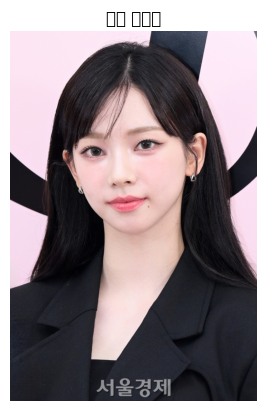

감지된 얼굴 수: 1


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50620 (\N{HANGUL SYLLABLE EOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44404 (\N{HANGUL SYLLABLE GUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

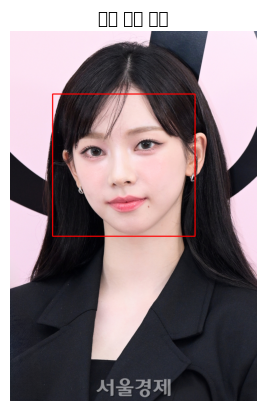

In [3]:
# ==========================================
# ✅ 1. OpenCV 설치
# ==========================================
!pip install opencv-python opencv-python-headless

# ==========================================
# ✅ 2. 이미지 업로드 (바탕화면의 사진 선택)
# ==========================================
from google.colab import files
uploaded = files.upload()  # 실행 후 이미지 파일 선택 (바탕화면 사진)

# 업로드된 파일 이름 확인
import os
filename = list(uploaded.keys())[0]
print(f"업로드된 파일 이름: {filename}")

# ==========================================
# ✅ 3. OpenCV로 이미지 불러오기
# ==========================================
import cv2
import matplotlib.pyplot as plt
import numpy as np # Import numpy

# 이미지 읽기 (한글 파일명도 대비)
img = cv2.imdecode(np.frombuffer(uploaded[filename], np.uint8), cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("원본 이미지")
plt.axis('off')
plt.show()

# ==========================================
# ✅ 4. 얼굴 인식 (Haar Cascade 사용)
# ==========================================
# 기본 제공 얼굴 인식 모델 다운로드
haarcascade_url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml"
cascade_path = "haarcascade_frontalface_default.xml"

import urllib.request
urllib.request.urlretrieve(haarcascade_url, cascade_path)

# 모델 불러오기
face_cascade = cv2.CascadeClassifier(cascade_path)

# 그레이스케일로 변환 (인식 성능 향상)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 검출
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
print(f"감지된 얼굴 수: {len(faces)}")

# 얼굴 위치 표시
for (x, y, w, h) in faces:
    cv2.rectangle(img_rgb, (x, y), (x+w, y+h), (255, 0, 0), 2)

# 결과 출력
plt.imshow(img_rgb)
plt.title("얼굴 인식 결과")
plt.axis('off')
plt.show()